3.1 컬러 영상을 채널별로 구분하기

In [7]:
import cv2
import sys

img = cv2.imread('soccer.jpg')

if img is None:
    sys.exit('nothing')

cv2.imshow('img',img)
cv2.imshow('img2',img[0:img.shape[0]//2, 0:img.shape[1]//2,:])

cv2.imshow('blue',img[:,:,0])
cv2.imshow('green',img[:,:,1])
cv2.imshow('red',img[:,:,2])

cv2.waitKey()
cv2.destroyAllWindows()

3.2 영상의 히스토그램 구하기

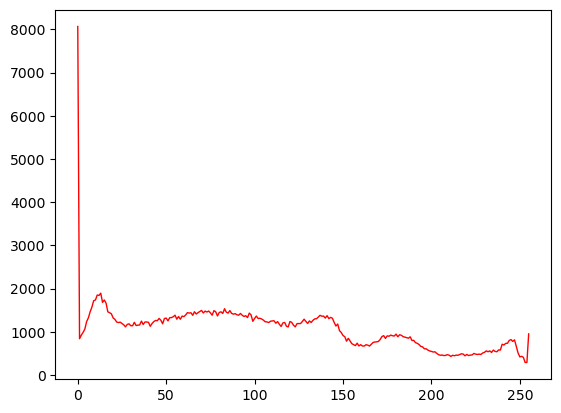

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('soccer.jpg')

h = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1)

3.3 오츄 알고리즘으로 이진화하기

In [2]:
import cv2
import sys

img = cv2.imread('soccer.jpg')

t, bin_img = cv2.threshold(img[:,:,2],0,255,cv2.THRESH_BINARY +cv2.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임곗값',t)

cv2.imshow('r',img[:,:,2])
cv2.imshow('r_binarization', bin_img)

cv2.waitKey()
cv2.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임곗값 112.0


모폴로지 연산 적용하기

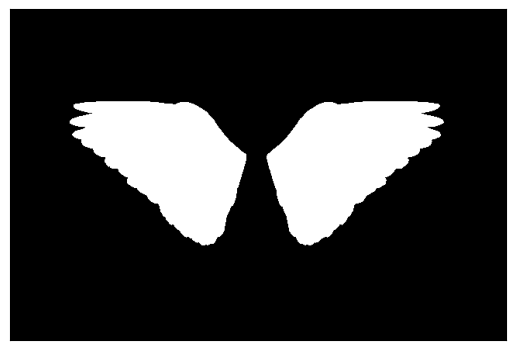

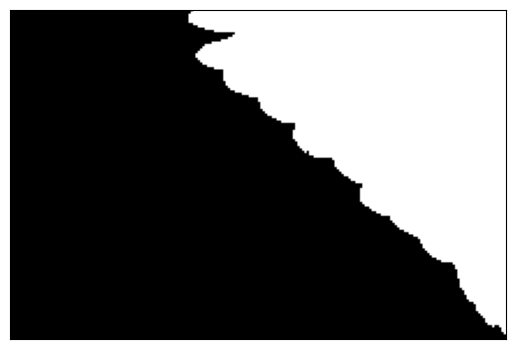

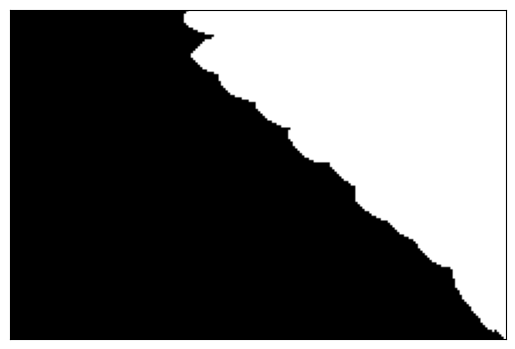

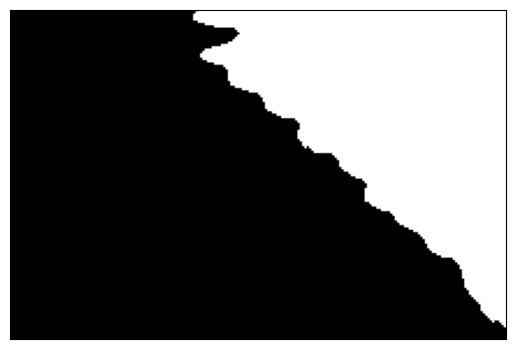

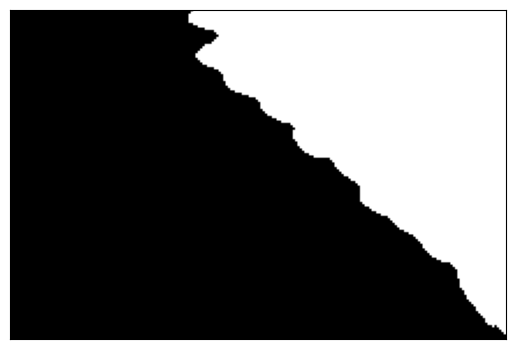

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

wing = cv2.imread('wing.png', cv2.IMREAD_UNCHANGED)

t,bin = cv2.threshold(wing[:,:,3],0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin,cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

b = bin[bin.shape[0]//3:2 * bin.shape[0]//3,0:bin.shape[0]//2+1]
plt.imshow(b,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

se = np.uint8([[0,0,1,0,0],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])

b_dilation = cv2.dilate(b,se,iterations=1)
plt.imshow(b_dilation,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

b_erosion = cv2.erode(b,se,iterations=1)
plt.imshow(b_erosion,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

b_closing = cv2.erode(cv2.dilate(b,se,iterations=1),se,iterations=1)
plt.imshow(b_closing,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

3.3 감마 보정

In [2]:
import cv2
import numpy as np

img = cv2.imread('soccer.jpg')
img = cv2.resize(img,dsize=(0,0),fx=0.25,fy=0.25)

def gamma(f,gamma=1.0):
    f1 = f/255.0
    return np.uint8(255*(f1**gamma))

gc = np.hstack((gamma(img,0.5),gamma(img,0.75),gamma(img,1.0),gamma(img,2.0),gamma(img,3.0)))
cv2.imshow('gamma',gc)
cv2.waitKey()
cv2.destroyAllWindows()

3.3 히스토그램 평활화하기

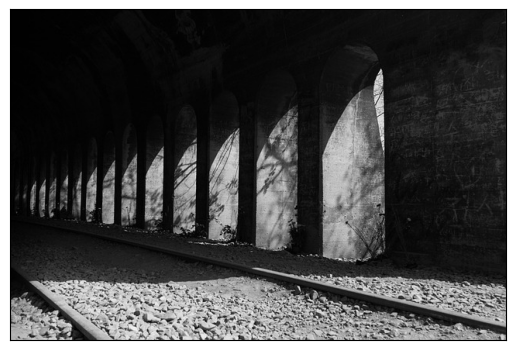

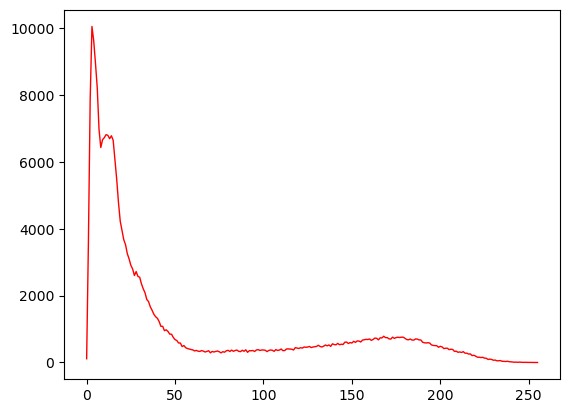

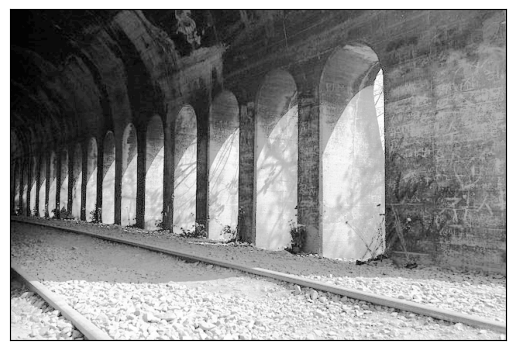

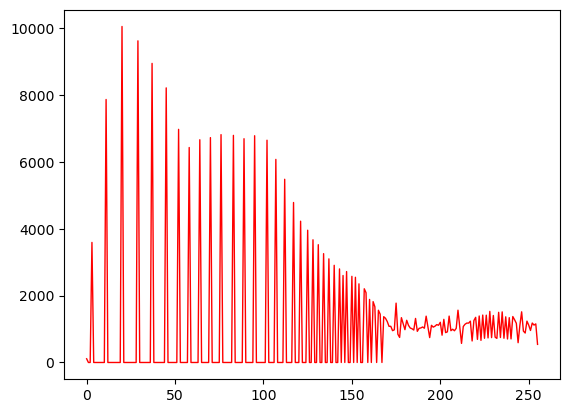

([<matplotlib.lines.Line2D at 0x2716af994c0>], None)

In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('dark2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray'), plt.xticks([]), plt.yticks([]),plt.show()

h = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1), plt.show()

equal = cv2.equalizeHist(gray)
plt.imshow(equal,cmap='gray'),plt.xticks([]),plt.yticks([]),plt.show()

h = cv2.calcHist([equal],[0],None,[256],[0,256])
plt.plot(h,color='r',linewidth=1),plt.show()

3.4 컨볼루션(가우시안 스무딩, 엠보싱)

In [4]:
import cv2
import numpy as np

img = cv2.imread('soccer2.jpg')
img = cv2.resize(img,dsize=(0,0),fx=0.4,fy=0.4)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('original',gray)

smooth = np.hstack((cv2.GaussianBlur(gray,(5,5),0.0),cv2.GaussianBlur(gray,(9,9),0.0),cv2.GaussianBlur(gray,(15,15),0.0)))

cv2.imshow('smooth',smooth)

femboss = np.array([[-1.0,0.0,0.0],
                    [0.0,0.0,0.0],
                    [0.0,0.0,1.0]])

gray16 = np.int16(gray)
emboss = np.uint8(np.clip(cv2.filter2D(gray16,-1,femboss)+128,0,255))
emboss_bad = np.uint8(cv2.filter2D(gray16,-1,femboss)+128)
emboss_worse =cv2.filter2D(gray16,-1,femboss)

cv2.imshow('emboss',emboss)
cv2.imshow('emboss_bad',emboss_bad)
cv2.imshow('emboss_worse',emboss_worse)

cv2.waitKey()
cv2.destroyAllWindows()

3.5 보간으로 영상 기하 변환

In [3]:
import cv2

img = cv2.imread('rose.jpg')

patch = img[200:250,200:250,:]

img = cv2.rectangle(img,(200,200),(250,250),(255,0,0),3)

patch1 = cv2.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv2.INTER_NEAREST)
patch2 = cv2.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv2.INTER_LINEAR)
patch3 = cv2.resize(patch,dsize=(0,0),fx=5,fy=5,interpolation=cv2.INTER_CUBIC)

cv2.imshow('original',img)
cv2.imshow('1',patch1)
cv2.imshow('2',patch2)
cv2.imshow('3',patch3)

cv2.waitKey()
cv2.destroyAllWindows()

3.6 직접 작성한 함수와 OpenCV 제공 함수 시간 비교

In [36]:
import cv2
import numpy as np
import time

def myg1(bgr):
    g = np.zeros([bgr.shape[0],bgr.shape[1]])
    for r in range(bgr.shape[0]):
        for c in range(bgr.shape[1]):
            g[r,c] = 0.114*bgr[r,c,0] + 0.587*bgr[r,c,1] + 0.299*bgr[r,c,2]
    return np.uint8(g)

def myg2(bgr):
    g = np.zeros([bgr.shape[0],bgr.shape[1]])
    g = 0.114*bgr[:,:,0] + 0.587*bgr[:,:,1] +0.299*bgr[:,:,2]
    return np.uint8(g)

img = cv2.imread('soccer.jpg')

start=time.time()
myg1(img)
print('myg1: ', time.time()-start)

start=time.time()
myg2(img)
print('myg2: ', time.time()-start)

start=time.time()
cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print('opencv: ', time.time()-start)

myg1:  2.500335693359375
myg2:  0.005983829498291016
opencv:  0.0
